<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/sessions_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%%capture
# For Google Colab:
#!pip install kats
!pip install kats[all]
!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv
#!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK_norm.csv

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from imp import reload
from datetime import datetime, timedelta
import sys
sys.path.append("../")

from kats.consts import TimeSeriesData
reload(logging)


<module 'logging' from '/usr/lib/python3.7/logging/__init__.py'>

In [22]:
#uk = pd.read_csv("UK.csv", sep=';', decimal=',')
uk = pd.read_csv("UK.csv")
uk = uk.rename(columns={'date':'time'})       # ts implica 'time'
print(uk.info(verbose=True))
print(uk.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      40 non-null     object
 1   year      40 non-null     int64 
 2   month     40 non-null     int64 
 3   sessions  40 non-null     int64 
 4   searches  40 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB
None
      time  year  month  sessions  searches
0  2019-01  2019      1   7454104  11404088
1  2019-02  2019      2   6791849   8546751
2  2019-03  2019      3   7151561   9545732
3  2019-04  2019      4   7111621   9653586
4  2019-05  2019      5   7799312  11082118


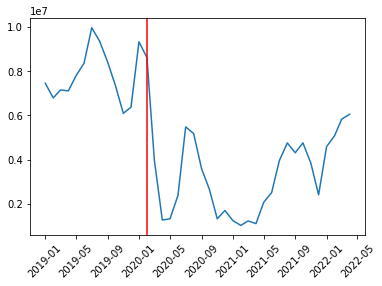

In [23]:
# import packages
from kats.detectors.cusum_detection import CUSUMDetector

tsd = TimeSeriesData(uk.loc[:,['time','sessions']])

detector = CUSUMDetector(tsd)
change_points = detector.detector()
#change_points = detector.detector(change_directions=["decrease"])
#change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()


In [24]:
print('# cp =', len(change_points))

change_point= change_points[0]
print(change_point)

print('cp_time','=', change_point.start_time, " <--> ",change_point.end_time) 
print('') 
print('confidence','=', change_point.confidence) 
print('direction','=', change_point.direction) 
print('cp_index','=', change_point.cp_index) 
print('mu0','=', change_point.mu0) 
print('mu1','=', change_point.mu1) 
print('delta','=', change_point.delta) 
print('llr_int','=', change_point.llr_int) 
print('llr','=',change_point.llr) 
print('regression_detected','=',change_point.regression_detected) 
print('stable_changepoint','=',change_point.stable_changepoint) 
print('p_value','=',change_point.p_value) 
print('p_value_int','=',change_point.p_value_int) 

# cp = 1
CUSUMChangePoint(start_time: 2020-02-01 00:00:00, end_time: 2020-02-01 00:00:00, confidence: 0.9999999999305712, direction: decrease, index: 13, delta: -4654069.851648351, regression_detected: True, stable_changepoint: True, mu0: 7870488.928571428, mu1: 3216419.076923077, llr: 46.781439210496615, llr_int: inf, p_value: 6.942879604565633e-11, p_value_int: nan)
cp_time = 2020-02-01 00:00:00  <-->  2020-02-01 00:00:00

confidence = 0.9999999999305712
direction = decrease
cp_index = 13
mu0 = 7870488.928571428
mu1 = 3216419.076923077
delta = -4654069.851648351
llr_int = inf
llr = 46.781439210496615
regression_detected = True
stable_changepoint = True
p_value = 6.942879604565633e-11
p_value_int = nan


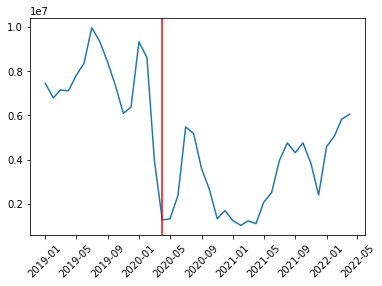

In [25]:
# import package
from kats.detectors.robust_stat_detection import RobustStatDetector

tsd = TimeSeriesData(uk.loc[:,['time','sessions']])
detector = RobustStatDetector(tsd)
change_points = detector.detector()

detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()

In [26]:
change_point = change_points[0]
change_point

TimeSeriesChangePoint(start_time: 2020-04-01T00:00:00.000000000, end_time: 2020-04-01T00:00:00.000000000, confidence: 0.9925085298585895)

In [27]:
print('metric','=',change_point.metric)
print('index','=',change_point.index)
uk['time'].iloc[change_point.index]

metric = 2399918.4000000004
index = 15


'2020-04'

In [28]:
from kats.utils.simulator import Simulator
from kats.tsfeatures.tsfeatures import TsFeatures
model = TsFeatures()
output_features = model.transform(tsd)
output_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



{'binarize_mean': 0.475,
 'crossing_points': 6,
 'diff1y_acf1': 0.3034131137792905,
 'diff1y_acf5': 0.4509243242949967,
 'diff1y_pacf5': 0.4802614481670804,
 'diff2y_acf1': -0.08690037266054514,
 'diff2y_acf5': 0.23121438613716527,
 'diff2y_pacf5': 0.7345328500758588,
 'entropy': 0.38509583828475963,
 'firstmin_ac': 4,
 'firstzero_ac': 10,
 'flat_spots': 1,
 'heterogeneity': 25.765883189358217,
 'histogram_mode': 1023488.0,
 'holt_alpha': 0.995,
 'holt_beta': 0.0001,
 'hurst': -0.023961517562423693,
 'hw_alpha': 0.995,
 'hw_beta': 0.0001,
 'hw_gamma': 0.0001,
 'length': 40,
 'level_shift_idx': 6,
 'level_shift_size': 437115.2000000002,
 'linearity': 0.3095718845525315,
 'lumpiness': 1.917265783604298e+23,
 'mean': 4845343.525,
 'peak': 6,
 'seas_acf1': 0.3554505562450361,
 'seas_pacf1': -0.32964546542773887,
 'seasonality_strength': 0.5492749649608077,
 'spikiness': 8.28154974216397e+20,
 'stability': 5164782102833.562,
 'std1st_der': 1111784.2580879584,
 'trend_strength': 0.8718229983

In [34]:


# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams( seasonality_mode='additive') # additive mode gives worse results - multiplicative

# create a prophet model instance
m = ProphetModel(tsd, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=2)   # , freq="MS"



# the predict method returns a dataframe as follows
print(fcst.head())



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


        time          fcst    fcst_lower    fcst_upper
0 2022-05-01  7.836698e+05 -1.729438e+06  3.326087e+06
1 2022-06-01  1.509298e+06 -1.177643e+06  3.815345e+06


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.7/dist-packages/kats/models/theta.py:130: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



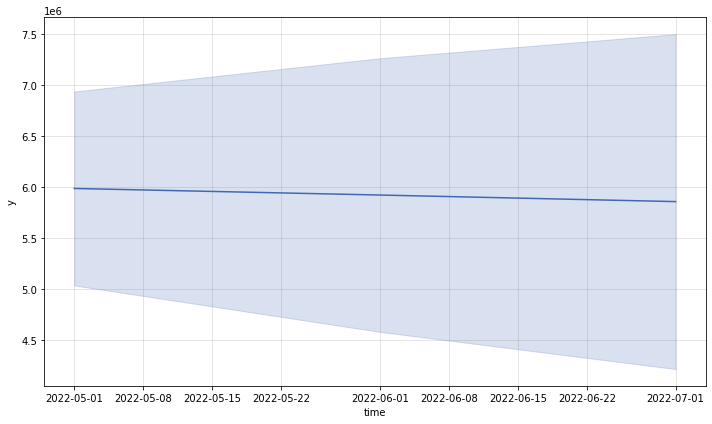

In [45]:
# import param and model from `kats.models.theta`
from kats.models.theta import ThetaModel, ThetaParams

# create ThetaParam with specifying seasonality param value
params = ThetaParams(m=12)

# create ThetaModel with given data and parameter class
m = ThetaModel(data=tsd, params=params)

# call fit method to fit model
m.fit()

# call predict method to predict the next 30 steps
res = m.predict(steps=3, alpha=0.5)

# visualize the results
m.plot()



In [41]:
ThetaModel.mle_retvals

AttributeError: ignored